In [14]:
# Домашнее задание (Алгоритмы классификации)
#Преподаватель: Константин Башевой

#Имеются данные adult.csv (см. в материалах к занятию или на гитхабе).
#Целевой переменной является уровень дохода income (крайний правый столбец).
#Описание признаков можно найти по ссылке http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

# Вам необходимо построить модель логистической регрессии, которая предсказывает уровень дохода человека. 
# При возможности попробуйте улучшить точность предсказаний (метод score) с помощью перебора признаков.

# Готовый ноутбук выложить на гитхаб и прислать ссылку.


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline


In [16]:
# Загрузим данные
data = pd.read_csv('adult.csv')

In [17]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [19]:
# Посмотрим значения категориальных переменных

In [20]:
data.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [21]:
data.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [22]:
data['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [23]:
data.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [24]:
data.relationship.value_counts()

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [25]:
data.race.value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [26]:
data.gender.value_counts()


Male      32650
Female    16192
Name: gender, dtype: int64

In [27]:
data['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [28]:
data.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [29]:
# Посторим модели

In [30]:
from sklearn.linear_model import LogisticRegression

In [61]:
# Уберем целевой параметр в отдельную  переменную
y = data['income'].apply(lambda x: 0 if x == '<=50K' else 1)
data_x = data.drop(columns=['income'])
# Перекодируем параметр gender
data_x['gender'] = data_x['gender'].map({'Male':1, 'Female':0})
data_x.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States


In [62]:

list_dummies_param =['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
# Функция возвращающая результат моделирования при использовании переменных из списка параметров
# категориальные переменные перекодируем с помощью 'one hot encoding'
def get_score(list_param, data , y, str_name):
    model = LogisticRegression()
    dummies_param = []
    for param in list_param:
        if param in list_dummies_param:
            dummies_param.append(param)
    X = pd.get_dummies(data[list_param], columns = dummies_param ) 
    #print(X.shape, y.shape)
    model.fit(X,y)
    predictions = model.predict_proba(X)
    score = model.score(X,y)
    return {str_name:{'score':score, 'pred':predictions}}
    

In [63]:
import warnings
warnings.filterwarnings('ignore')

# Используем что то вроде жадного алгоритма для отбора параметров
# на каждой итерации находим параметр дающий наибольший прирост score
resault=[]
keys_all =  list(data_x.keys())
keys = keys_all[:]
select_params = []
str_name = ''
while len(keys) > 0:
    tmp_max_score, tmp_name_param_max_score, max_res= 0, '', None
    for key in keys:
        cur_select_params = select_params[:]
        cur_select_params.append(key)
        res = get_score(cur_select_params, data_x, y, str_name+'.'+str(keys_all.index(key)))
        cur_score =  res[str_name+'.'+str(keys_all.index(key))]['score']
        #print('Score: {}, Набор параметров:'.format(cur_score), cur_select_params)
        if cur_score > tmp_max_score:
            tmp_max_score, tmp_name_param_max_score, max_res= cur_score, key, res
            
    select_params.append(tmp_name_param_max_score)
    str_name = str_name + '.'+str(str(keys_all.index(tmp_name_param_max_score)))
    keys.remove(tmp_name_param_max_score)
    resault.append(max_res)
        
    
    

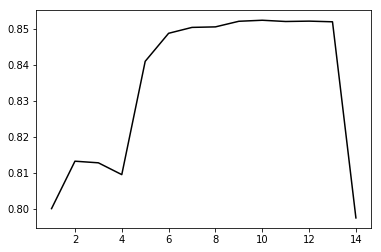

Для 1 	 параметр(a/ов) score : 0.80007 	(.10)  
Для 2 	 параметр(a/ов) score : 0.81323 	(.10.11)  
Для 3 	 параметр(a/ов) score : 0.81278 	(.10.11.13)  
Для 4 	 параметр(a/ов) score : 0.80951 	(.10.11.13.4)  
Для 5 	 параметр(a/ов) score : 0.84096 	(.10.11.13.4.7)  
Для 6 	 параметр(a/ов) score : 0.84874 	(.10.11.13.4.7.6)  
Для 7 	 параметр(a/ов) score : 0.85037 	(.10.11.13.4.7.6.1)  
Для 8 	 параметр(a/ов) score : 0.85052 	(.10.11.13.4.7.6.1.12)  
Для 9 	 параметр(a/ов) score : 0.85207 	(.10.11.13.4.7.6.1.12.0)  
Для 10 	 параметр(a/ов) score : 0.85236 	(.10.11.13.4.7.6.1.12.0.9)  
Для 11 	 параметр(a/ов) score : 0.85201 	(.10.11.13.4.7.6.1.12.0.9.5)  
Для 12 	 параметр(a/ов) score : 0.85211 	(.10.11.13.4.7.6.1.12.0.9.5.3)  
Для 13 	 параметр(a/ов) score : 0.85193 	(.10.11.13.4.7.6.1.12.0.9.5.3.8)  
Для 14 	 параметр(a/ов) score : 0.79749 	(.10.11.13.4.7.6.1.12.0.9.5.3.8.2)  


In [64]:
# Выведем как менялся score при увеличении количества учавствующих параметров
#  в выоде в скобках через точку показаны номера параметров в списке ключей
# начинаем с одного параметра и двигаемся ло всех
keys_param = [list(x.keys())[0] for x in resault]
count_param = [i for i in range(1, len(keys_param)+1)]
keys_param_score = [x[list(x.keys())[0]]['score']for x in resault]
plt.plot(count_param, keys_param_score, 'k-')
plt.show()
for i in range(0, len(keys_param)):
    print(f'Для {i+1} \t параметр(a/ов) score : {keys_param_score[i]:.5f} \t({keys_param[i]})  ')

In [65]:
resault=[]
keys_all =  list(data_x.keys())
keys = keys_all[:]
select_params = []
str_name = '.'
cur_select_params = keys_all[:]
cur_str_name = "".join(['.'+str(keys_all.index(k)) for k in cur_select_params])
res = get_score(cur_select_params, data_x, y, cur_str_name)
resault.append(res)
while len(keys) > 1:
    tmp_max_score, tmp_name_param_max_score, max_res= 0, '', None
    for key in keys:
        cur_select_params = keys_all[:]
        cur_select_params = list(set(cur_select_params) - (set(select_params).union(set([key,]))))
        if len(cur_select_params) < 1:
            continue
        cur_str_name = "".join(['.'+str(keys_all.index(k)) for k in cur_select_params])
       
        res = get_score(cur_select_params, data_x, y, cur_str_name)
        cur_score =  res[cur_str_name]['score']
        #print('Score: {}, Набор параметров:'.format(cur_score), cur_select_params)
        if cur_score > tmp_max_score:
            tmp_max_score, tmp_name_param_max_score, max_res= cur_score, key, res
            
    select_params.append(tmp_name_param_max_score)
    str_name = "".join(['.'+str(keys_all.index(k)) for k in select_params])
    keys.remove(tmp_name_param_max_score)
    resault.append(max_res)

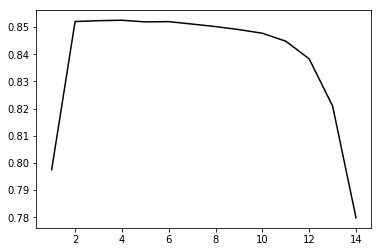

Для 1 	 параметр(a/ов) score : 0.79749 	(.0.1.2.3.4.5.6.7.8.9.10.11.12.13)  
Для 2 	 параметр(a/ов) score : 0.85207 	(.12.3.13.11.9.5.0.4.7.8.10.1.6)  
Для 3 	 параметр(a/ов) score : 0.85238 	(.12.3.13.11.9.5.0.7.8.10.1.6)  
Для 4 	 параметр(a/ов) score : 0.85254 	(.12.3.13.11.9.0.7.8.10.1.6)  
Для 5 	 параметр(a/ов) score : 0.85193 	(.12.3.13.11.9.0.7.10.1.6)  
Для 6 	 параметр(a/ов) score : 0.85203 	(.12.3.13.11.0.7.10.1.6)  
Для 7 	 параметр(a/ов) score : 0.85113 	(.12.3.11.0.7.10.1.6)  
Для 8 	 параметр(a/ов) score : 0.85021 	(.12.3.11.0.7.10.6)  
Для 9 	 параметр(a/ов) score : 0.84911 	(.3.11.0.7.10.6)  
Для 10 	 параметр(a/ов) score : 0.84775 	(.3.11.7.10.6)  
Для 11 	 параметр(a/ов) score : 0.84483 	(.7.3.10.6)  
Для 12 	 параметр(a/ов) score : 0.83832 	(.7.3.10)  
Для 13 	 параметр(a/ов) score : 0.82093 	(.7.3)  
Для 14 	 параметр(a/ов) score : 0.77974 	(.3)  


In [66]:
keys_param = [list(x.keys())[0] for x in resault]
count_param = [i for i in range(1, len(keys_param)+1)]
keys_param_score = [x[list(x.keys())[0]]['score']for x in resault]
plt.plot(count_param, keys_param_score, 'k-')
plt.show()
for i in range(0, len(keys_param)):
    print(f'Для {i+1} \t параметр(a/ов) score : {keys_param_score[i]:.5f} \t({keys_param[i]})  ')